In [1]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from twitterscraper import query_tweets, query_user_info
from tqdm import tqdm

# Turning off all kinds of logging since it takes space on screen
import logging
logging.disable(logging.CRITICAL)

INFO: {'User-Agent': 'Mozilla/5.0 (compatible, MSIE 11, Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}


In [ ]:
# Useful functions for creating dataframe

In [2]:
def tweets_df(results):
    data_set = pd.DataFrame()
    
    data_set["user_id"] = [tweet.user_id for tweet in results]
    data_set["screen_name"] = [tweet.screen_name for tweet in results]
    data_set["tweet_id"] = [tweet.tweet_id for tweet in results]
    data_set["tweet_url"] = [tweet.tweet_url for tweet in results]
    data_set["timestamp"] = [tweet.timestamp for tweet in results]
    data_set["text"] = [tweet.text for tweet in results]
    data_set["hashtags"] = [tweet.hashtags for tweet in results]
    data_set["has_media"] = [tweet.has_media for tweet in results]
    data_set["img_urls"] = [tweet.img_urls for tweet in results]
    data_set["video_url"] = [tweet.video_url for tweet in results]
    
    # Drop duplicates and reset index
    data_set.drop_duplicates(subset = ["tweet_id","text"], inplace=True)
    data_set.reset_index(drop=True, inplace=True)
    
    return data_set

In [3]:
# This function takes time to execute when called!

def get_location(df):
    locs = []
    with tqdm(total = len(df)) as pbar:
        for name in df.screen_name:
            user = query_user_info(name)
            if user != None:
                locs.append(user.location)
            else:
                locs.append(' ')
            pbar.update(1)
        
    # Adding column for locations
    df["user_location"] = locs

In [ ]:
# Using twitterscraper with Twitter's advanced search query 
# From: 01 Jan'20 
# To: 20 May'20
# Location: Radius of 2000km from central point of India
# Language: English

In [4]:
tweets = query_tweets("harassment (sexual OR abuse OR harass OR obscene OR domestic OR violence OR beat OR assault OR \
                      molest OR dowry OR acidattack OR rape OR pornography OR porn OR molestation OR #metoo OR \
                      tiktok OR online OR justice OR victim) \
                      until:2020-05-20 since:2020-01-01 -filter:replies near:22,80 within:2000km", limit=None, lang='en');
print(f'Got {len(tweets)} tweets.')

Got 521 tweets.


In [5]:
data_set = tweets_df(tweets)
get_location(data_set)

100%|████████████████████████████████████████████████████████████████████████████████| 501/501 [22:15<00:00,  2.67s/it]


In [ ]:
# Extracting more tweets (different query) and saving in df1

In [6]:
more_tweets1 = query_tweets("sexual (harassing OR harass OR harassed OR abuse OR domestic OR violence OR beat OR assault OR \
                            pictures OR molest OR dowry OR acidattack OR rape OR shame OR accused OR pornography OR porn OR \
                            metoo OR tiktok OR content OR online OR illegal OR report OR justice OR lockdown OR victim) \
                            until:2020-05-20 since:2020-01-01 -filter:replies near:22,80 within:2000km", limit=None, lang='en');
print(f'Got {len(more_tweets1)} tweets.')

Got 1067 tweets.


In [7]:
df1 = tweets_df(more_tweets1)
get_location(df1)

100%|██████████████████████████████████████████████████████████████████████████████| 1048/1048 [47:56<00:00,  2.74s/it]


In [ ]:
# Extracting more tweets (different query) and saving in df2

In [13]:
more_tweets2 = query_tweets("(wife OR husband OR relative OR boyfriend OR father OR mother OR cousin OR inlaw OR in-law) \
                            AND (abuse OR violence OR domestic OR sexual OR harass OR harasssing OR assault OR torture OR rape) \
                            until:2020-05-20 since:2020-01-01 -filter:replies near:22,80 within:2000km", 
                            limit=None, lang='en');
print(f'Got {len(more_tweets2)} tweets.')

Got 450 tweets.


In [14]:
df2 = tweets_df(more_tweets2)
get_location(df2)

100%|████████████████████████████████████████████████████████████████████████████████| 433/433 [21:23<00:00,  2.96s/it]


In [ ]:
# Appending all dataframes

In [15]:
data_set = data_set.append([df1,df2], ignore_index= True)
data_set

,user_id,screen_name,tweet_id,tweet_url,timestamp,text,hashtags,has_media,img_urls,video_url,user_location
0,1139435031204548608,zkwnsaari,1262868325803024389,/zkwnsaari/status/1262868325803024389,2020-05-19 22:10:46,"Cornering men with the phrase ""sexual harassme...",[],0.0,[],,"Perak, Malaysia"
1,1262662724628238338,anuglywoman1,1262856464651243525,/anuglywoman1/status/1262856464651243525,2020-05-19 21:23:38,Sexual harassment..is to make someone fucked u...,[],0.0,[],,Pain
2,15199808,Vidyut,1262838343404044296,/Vidyut/status/1262838343404044296,2020-05-19 20:11:38,Fellow asking about abuse women face online/st...,[],0.0,[],,India
3,257394747,PramodChturvedi,1262824245517672449,/PramodChturvedi/status/1262824245517672449,2020-05-19 19:15:36,Case registered against employee of private co...,"[AndhraPradesh, Krishna]",0.0,[],,"Hyderabad, New Delhi, Ballia"
4,2247560024,FeminismInIndia,1262816952164196355,/FeminismInIndia/status/1262816952164196355,2020-05-19 18:46:38,Institutional Failures & The Increasing Relian...,[],0.0,[],,India
...,...,...,...,...,...,...,...,...,...,...,...
1977,1156956207640244224,Mohit__solanki,1212256040089075712,/Mohit__solanki/status/1212256040089075712,2020-01-01 06:15:37,Golden Time Is Coming\nThe other woman and gir...,[स],0.0,[],,"Firozpur, India"
1978,1021320995691302912,RamshankarDass,1212253447279374337,/RamshankarDass/status/1212253447279374337,2020-01-01 06:05:19,#स्वर्ण_युग Golden Time Is Coming\nThe other w...,[स],1.0,[https://pbs.twimg.com/media/ENLKFG1U8AA5RqH.jpg],,"Ater, India"
1979,838337330322751488,BRAJBHANDAS1234,1212234940441493505,/BRAJBHANDAS1234/status/1212234940441493505,2020-01-01 04:51:46,#स्वर्ण_युग#स्वर्ण_युग\nGolden Time Is Coming\...,"[स, स]",1.0,[https://pbs.twimg.com/media/ENK5O_DUwAEnmUY.jpg],,"Gandhidham, India"
1980,972168388490379264,NiteshP82110245,1212212166549331969,/NiteshP82110245/status/1212212166549331969,2020-01-01 03:21:16,#HeavenOnEarth_By_SaintRampalJi\n Time Is Comi...,[HeavenOnEarth_By_SaintRampalJi],1.0,[https://pbs.twimg.com/media/ENKkdxCVAAAxcxF.jpg],,"मध्य प्रदेश, भारत"


In [16]:
# Saving the file

data_set.to_csv('more-tweets-extracted.csv', index=False)

In [17]:
# Locations are mostly from India and some from nearby places
data_set.user_location.value_counts()

India                            172
                                 151
New Delhi, India                 108
Pakistan                          85
                                  74
                                ... 
Hyderabad India                    1
Hollywood, CA                      1
Lahore                             1
Abul Fazal Enclave, New Delhi      1
kabul, Afghanistan                 1
Name: user_location, Length: 586, dtype: int64

In [ ]:
# Analysis of tweets count vs month

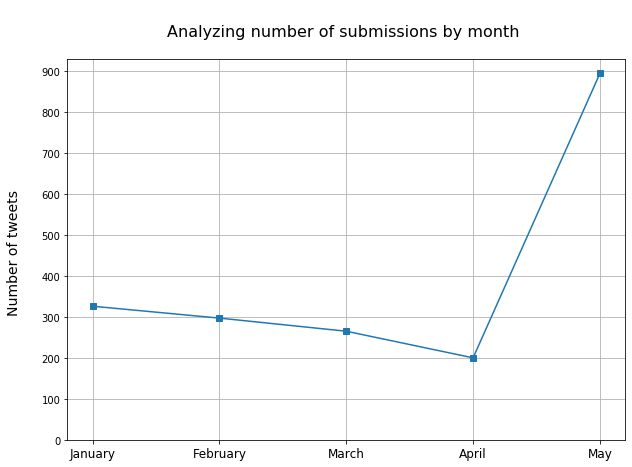

In [18]:
resampled_data = data_set.resample("M", on='timestamp').count()[['tweet_id']]
resampled_data.rename(columns = {'tweet_id':'total_tweets'}, inplace = True) 
resampled_data['month'] = resampled_data.index.month

labels = ["January", "February", "March", "April", "May"]
total = len(data_set)
data_months = {i: 0 for i in range(1, 6)}

for k, v in data_months.items():
    data_months[k] = np.sum(resampled_data.total_tweets[resampled_data.month == k])

plt.figure(figsize =(10,7))
plt.plot(*zip(*sorted(data_months.items())), marker='s')

plt.xticks(list(data_months.keys()), labels, fontsize=12)
plt.yticks(np.arange(0, max(data_months.values())+100, 100))
plt.ylabel("Number of tweets \n", fontsize=14)
plt.title("\nAnalyzing number of submissions by month \n", fontsize=16)
plt.grid()
plt.show()

In [19]:
# Getting insights by creating a wordcloud

def make_wordcloud(col):
    print('Creating wordcloud...')
    contentCorpus = col.values
    wordcloud = WordCloud(width = 3000, height = 2000, max_words=750).generate(str(contentCorpus))
    fig = plt.figure(figsize = (10, 8), facecolor = 'white', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title('Content Corpus')
    plt.show()

Creating wordcloud...


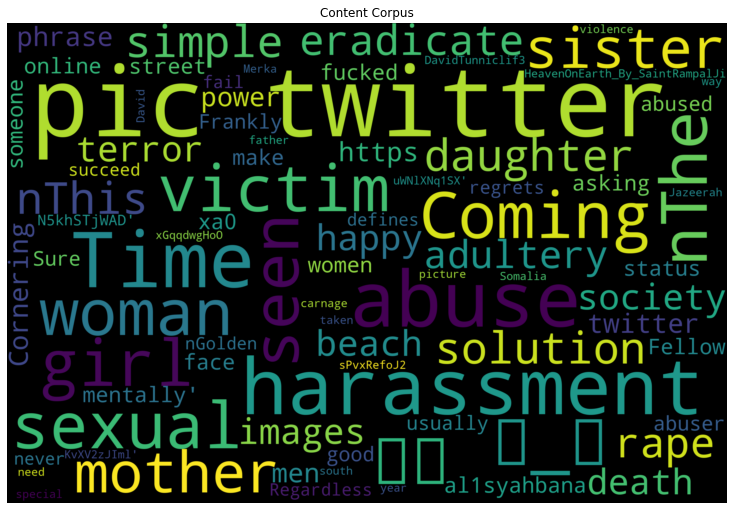

In [20]:
make_wordcloud(data_set['text'])